In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
%matplotlib inline

In [2]:
# the first dataframe downloaded manually
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#test
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#test
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [5]:
# Downloading and saving the image prediction data using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#Extract the file name from the url 
file_name = url.split("/")[-1] 
#Get response object by applying the requests package
response = requests.get(url)
#to get the content of the url 
url_content = response.content

if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
         f.write(url_content)

In [6]:
# the second dataframe
image_predictions=pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
#test
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
#test
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [9]:
#since i prfere not ot create twitter account for personal reason i choose the second approach
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

In [10]:
# list will contain values of each observation (line)
df_list = []
# open the json file 
with open('tweet-json.txt', 'r') as json_file:
    # as a large file we read it line by line and deal with each line as observation  
    for line in  json_file:
        #we convert string to dictionary to extract data from it 
        tweet = json.loads(line)
        #get the data of each observation using the key of the dictionary 
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        followers_count=tweet['user']['followers_count']
         
        #store the data of each observation(line) in a dictionary with columns names then append in list 
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'followers_count':followers_count})
#the third dataframe        
api_df= pd.DataFrame(df_list)
api_df.head()


,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


#### assessment
we usually assess visually first , then programatically using pandas functions and ect.


#### Quality
##### `twitter_archive` table

- tweet_id string not int (consistency issues):
- timestamp datetime not object (consistency issues):
- it is only tweets not retweets (completeness)
- it is only tweets not reply(completeness)
- retweets and reply columns are useless now (consistency issues):
- it is tweet without image(completeness)
- in expanded_urls columns remove missing values(completeness)
- in  dog classifier columns  change none into ‘’ (consistency issues)
- in  name column change none into ‘’(consistency issues)


##### `image_predictions` table
- tweet_id string not int(consistency issues):
- name of prediction and confidence columns is not readable (consistency issues)
- confidence  columns refer to accuracy of prediction so it should be *100 then convert into int to be statistically (consistency issues)
- tweet_id has to be the same of twitter_arcive after dropping(completeness)


##### `api_df` table
- tweet_id string not int(consistency issues):
- tweet_id has to be the same of twitter_arcive after dropping(completeness)



#### Tidiness
- instead of (doggo, floofer, pupper, puppo) only use one column for dog_bread.
- since Each type of observational unit forms a table , so we don't need to have api and archive separable since we deal with the same type of observational unit.


In [11]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
twitter_archive.shape

(2356, 17)

In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
image_predictions.shape

(2075, 12)

In [16]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [19]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [21]:
api_df.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [22]:
api_df.shape

(2354, 4)

In [23]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [24]:
api_df.describe()

,tweet_id,retweet_count,favorite_count,followers_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


#### cleaning
- cleaning has 3 steps: define , code and test.
- in cleaning we usually start with drop missing value and completeness issues
- then we deal with tiredness issues.
- then dealing with quality issues.

In [25]:
#copy the origingal data set befor cleaning

archive_clean=twitter_archive.copy()
image_clean=image_predictions.copy()
api_clean=api_df.copy()

In [26]:
#define
# start by completness issues
# drop retweet from archive
#code
#retweets
retweet=archive_clean[pd.notnull(archive_clean.retweeted_status_id) ]
retweet_id=(retweet.tweet_id).tolist()
print(len(retweet_id))
#drop retweet in archive
for retweet in retweet_id:
    
    archive_clean.drop( archive_clean[ archive_clean['tweet_id'] == retweet ].index, inplace=True)

181


In [27]:
#test
archive_clean.shape

(2175, 17)

In [28]:
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [29]:
#define
# drop reply from archive
#code
count=0
#replys
reply=archive_clean[pd.notnull(archive_clean.in_reply_to_status_id) ]
reply_id =reply.tweet_id.tolist()
print(len(reply_id))
for re in reply_id:
    if( re in retweet_id):
        count+=1
        print(count)
        
#drop reply in archive
for rep in reply_id:
    
    archive_clean.drop( archive_clean[ archive_clean['tweet_id'] == rep ].index, inplace=True)

78


In [30]:
#test
archive_clean.shape

(2097, 17)

In [31]:
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [32]:
#define
#drop retweet and repley columns
#code
archive_clean.drop([ 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id',\
               'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

In [33]:
#test
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [34]:
#define
# missing of expanded_urls
#code
missing_expand= archive_clean[pd.isnull(archive_clean.expanded_urls) ]
missing_expand_id=missing_expand.tweet_id.tolist()
print(len(missing_expand_id))
        
#drop missing of expanded_urls in archive
for expand in missing_expand_id:
    
    archive_clean.drop( archive_clean[ archive_clean['tweet_id'] == expand ].index, inplace=True)

3


In [35]:
#test
archive_clean.shape

(2094, 12)

In [36]:
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   doggo               2094 non-null   object
 9   floofer             2094 non-null   object
 10  pupper              2094 non-null   object
 11  puppo               2094 non-null   object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


In [37]:
#define
# remove tweets that in tweet_archive and not in image_prediction since it is tweets without images.
#code
# the tweet without images

without_images_id=[]
imgage_tweet_id=(image_clean.tweet_id).tolist()
archive_tweet_id=(archive_clean.tweet_id).tolist()

for ids in archive_tweet_id:
    if (ids not in imgage_tweet_id ):
        without_images_id.append(ids)

#delete the tweets without images form twitter_archive
for without in without_images_id:
    
    archive_clean.drop( archive_clean[ archive_clean['tweet_id'] == without].index, inplace=True)  

In [38]:
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   doggo               1971 non-null   object
 9   floofer             1971 non-null   object
 10  pupper              1971 non-null   object
 11  puppo               1971 non-null   object
dtypes: int64(3), object(9)
memory usage: 200.2+ KB


In [39]:
#define
#drop in image_prediction
#drop retweet
#code
for retweet in retweet_id:
    
    image_clean.drop( image_clean[ image_clean['tweet_id'] == retweet ].index, inplace=True)

#drop reply
for rep in reply_id:
    
    image_clean.drop( image_clean[ image_clean['tweet_id'] == rep ].index, inplace=True)

#drop expand
for expand in missing_expand_id:
    
    image_clean.drop( image_clean[ image_clean['tweet_id'] == expand ].index, inplace=True)

In [40]:
#test
image_clean.shape

(1971, 12)

In [41]:
#define
#drop in api_df
#drop retweet
#code
for retweet in retweet_id:
    
    api_clean.drop( api_clean[ api_clean['tweet_id'] == retweet ].index, inplace=True)

#drop reply
for rep in reply_id:
    
    api_clean.drop( api_clean[ api_clean['tweet_id'] == rep ].index, inplace=True)

#drop expand
for expand in missing_expand_id:
    
    api_clean.drop( api_clean[ api_clean['tweet_id'] == expand ].index, inplace=True)
    
#drop tweets without images
for without in without_images_id:
    
    api_clean.drop( api_clean[ api_clean['tweet_id'] == without].index, inplace=True)

In [42]:
#test
api_clean.shape

(1971, 4)

In [43]:
#cleaning tidness issues
#define
# in twitter_archive Column headers are values in ( 'doggo', 'floofer','pupper', 'puppo')
#so instead of dealing of 4columns we will deal with only one column as dog_step using mely()



In [44]:
#define
# i want to know how many dog'classifier in my twitter_archive
(archive_clean.loc[:, 'doggo':"puppo"] != 'None') .sum()

doggo       73
floofer      8
pupper     209
puppo       23
dtype: int64

In [45]:
#define
# Getting all the tweets where the value of both 'doggo' and 'pupper' is not none
nonunique_stage = archive_clean[(archive_clean['doggo'] != 'None') & (archive_clean['pupper'] != 'None')]

# Extracting only those the columns of interest and investigate its head
nonunique_stage.iloc[:, -4:].head()

,doggo,floofer,pupper,puppo
460,doggo,None,pupper,None
531,doggo,None,pupper,None
575,doggo,None,pupper,None
705,doggo,None,pupper,None
889,doggo,None,pupper,None


In [46]:
#from the previous 2 cell we now know that one dog colud have more thean on classifier 
#so we could add thes classifiers in only on column by adding the not to be new classifier and drop the original columns
#but for now we need to convert none in to "" to be easy in the add operation 
#code
# convert none into nan in 'doggo', 'floofer', 'pupper', 'puppo' columns
archive_clean['doggo'].replace('None', "", inplace=True)
archive_clean['floofer'].replace('None', "", inplace=True)
archive_clean['pupper'].replace('None', "", inplace=True)
archive_clean['puppo'].replace('None', "", inplace=True)

In [47]:
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   doggo               1971 non-null   object
 9   floofer             1971 non-null   object
 10  pupper              1971 non-null   object
 11  puppo               1971 non-null   object
dtypes: int64(3), object(9)
memory usage: 200.2+ KB


In [48]:
#test
archive_clean['doggo'].value_counts()

         1898
doggo      73
Name: doggo, dtype: int64

In [49]:
#test
archive_clean['floofer'].value_counts()

           1963
floofer       8
Name: floofer, dtype: int64

In [50]:
#test
archive_clean['pupper'].value_counts()

          1762
pupper     209
Name: pupper, dtype: int64

In [51]:
#test
archive_clean['puppo'].value_counts()

         1948
puppo      23
Name: puppo, dtype: int64

In [52]:
#now i will add the 4 columns of dog'classifier
archive_clean['dog_breed']=archive_clean['doggo']+archive_clean['floofer']+archive_clean['pupper']+archive_clean['puppo']
    

In [53]:
#test
archive_clean['dog_breed'].value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_breed, dtype: int64

In [54]:
#fix meaningless values
archive_clean['dog_breed'] = np.where((archive_clean['dog_breed'] == 'doggopupper'),'doggo-pupper',archive_clean['dog_breed'])
archive_clean['dog_breed'] = np.where((archive_clean['dog_breed'] == 'doggofloofer'),'doggo-floofer',archive_clean['dog_breed'])
archive_clean['dog_breed'] = np.where((archive_clean['dog_breed'] == 'doggopuppo'),'doggo-puppo',archive_clean['dog_breed'])   

In [55]:
#test
archive_clean['dog_breed'].value_counts()

                 1668
pupper            201
doggo              63
puppo              22
doggo-pupper        8
floofer             7
doggo-floofer       1
doggo-puppo         1
Name: dog_breed, dtype: int64

In [56]:
#code
#now we could drop the 4 columns of dog'classifier
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [57]:
#test
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_breed'],
      dtype='object')

In [58]:
# another tidness problem 
#define
#since Each type of observational unit forms a table 
#so we don't need to have api and archive seperare since we deal with the same type of observational unit
# we will merge them 

In [59]:
#code 
archive_clean=pd.merge(archive_clean, api_clean, on='tweet_id')

In [60]:
#Test
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8853,39467,3200889
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,6514,33819,3200889
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,4328,25461,3200889
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,8964,42908,3200889
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,9774,41048,3200889
...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,,41,111,3201018
1967,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,,147,311,3201018
1968,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,,47,128,3201018
1969,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,,48,132,3201018


In [61]:
#test
api_id=(api_clean.tweet_id).tolist()

In [62]:
#test
api_clean[api_clean.tweet_id==api_id[5]]

,tweet_id,retweet_count,favorite_count,followers_count
5,891087950875897856,3261,20562,3200889


In [63]:
#Test
archive_clean[archive_clean.tweet_id==api_id[5]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,followers_count
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,,3261,20562,3200889


In [64]:

#after finishing both completness and tideness issues we have to fix quality issues

In [65]:
#define
#we will convert tweet_id in every data frame from int to string since we will not use it in any mathmatical operation


#code

archive_clean["tweet_id"]=archive_clean["tweet_id"].astype(str)
image_clean["tweet_id"]=image_clean["tweet_id"].astype(str)



In [66]:
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   object
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   dog_breed           1971 non-null   object
 9   retweet_count       1971 non-null   int64 
 10  favorite_count      1971 non-null   int64 
 11  followers_count     1971 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 200.2+ KB


In [67]:
#test
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   object 
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


In [68]:
#define
#convert datastamp column from object into datastamp
#code
archive_clean["timestamp"]=archive_clean["timestamp"].apply(pd.to_datetime)


In [69]:
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_breed           1971 non-null   object             
 9   retweet_count       1971 non-null   int64              
 10  favorite_count      1971 non-null   int64              
 11  followers_count     1971 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5

In [70]:
#Test
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8853,39467,3200889
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,6514,33819,3200889
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,4328,25461,3200889
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,8964,42908,3200889
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,9774,41048,3200889


In [71]:
#define
#change none values from name into ""
#code
archive_clean['name'].replace('None', "", inplace=True)

In [72]:
#test
archive_clean['name'].value_counts()

           524
a           55
Charlie     11
Lucy        10
Oliver      10
          ... 
Ester        1
Grady        1
Jeffri       1
Arnie        1
Darby        1
Name: name, Length: 935, dtype: int64

In [73]:
#define the rating in  'rating_denominator'
archive_clean['rating_denominator'].value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [74]:
#define 
#since 'rating_denominator' is almost  10 so other is outlier
#define
outlier1=archive_clean[(archive_clean.rating_denominator)!=10  ]
outlier1_id=(outlier1.tweet_id).tolist()
print(len(outlier1_id))


17


In [75]:
#define
outlier1

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,followers_count
320,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,,,3716,13518,3200894
382,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,,1655,5927,3200896
658,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,,,2539,5316,3200942
794,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,,,9220,20648,3200943
842,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,,1434,4196,3200944
884,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,,,1764,4493,3200945
918,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,,247,2574,3200945
939,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,,,829,3062,3200947
963,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,,,636,2529,3200947
981,709198395643068416,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,,,721,2634,3200947


In [76]:
#define
#now we will compare the values of the denominator outlier with nominators and text
for i in outlier1.text:
    print(i)
    print("\n")


The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd


Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE


After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ


Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a


This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1


Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co

In [77]:
#define
archive_clean['rating_numerator'].value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [78]:
#code
#after show all these values we need to fix them
col1='rating_denominator'
col2='rating_numerator'
# we have 7 dogs
archive_clean[col1] = np.where(((archive_clean[col1] ==70 )&(archive_clean[col2] == 84)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean[col1] == 10)&(archive_clean[col2] ==84 )),12,archive_clean[col2])
# we have 15 dogs
archive_clean[col1] = np.where(((archive_clean[col1] ==150)&(archive_clean[col2] == 165)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean[col1] == 10)&(archive_clean[col2] ==165)),11,archive_clean[col2])
#confusing
archive_clean[col1] = np.where(((archive_clean[col1] ==11)&(archive_clean[col2] == 9)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean['text'] =='After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ' )),14,archive_clean[col2])
# we have 17 dogs
archive_clean[col1] = np.where(((archive_clean[col1] ==170)&(archive_clean[col2] == 204)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean[col1] == 10)&(archive_clean[col2] ==204)),12,archive_clean[col2])
#confusing
archive_clean[col1] = np.where(((archive_clean[col1] ==20)&(archive_clean[col2] == 4)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean['text'] == 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a')),13,archive_clean[col2])
#confusing
archive_clean[col1] = np.where(((archive_clean[col1] ==50)&(archive_clean[col2] == 50)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean[col1] == 10)&(archive_clean[col2] ==50)),11,archive_clean[col2])
# we have 9 dogs
archive_clean[col1] = np.where(((archive_clean[col1] ==90)&(archive_clean[col2] == 99)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean[col1] == 10)&(archive_clean[col2] ==99)),11,archive_clean[col2])
# we have 8 dogs
archive_clean[col1] = np.where(((archive_clean[col1] ==80)&(archive_clean[col2] == 80)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean[col1] == 10)&(archive_clean[col2] ==80)),10,archive_clean[col2])
# we have 5 dogs
archive_clean[col1] = np.where(((archive_clean[col1] ==50)&(archive_clean[col2] == 45)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean[col1] == 10)&(archive_clean[col2] ==45)),9,archive_clean[col2])
# we have 5 dogs
archive_clean[col1] = np.where(((archive_clean[col1] ==50)&(archive_clean[col2] == 60)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean[col1] == 10)&(archive_clean[col2] ==60)),12,archive_clean[col2])
# we have 4 dogs
archive_clean[col1] = np.where(((archive_clean[col1] ==40)&(archive_clean[col2] == 44)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean[col1] == 10)&(archive_clean[col2] ==44)),11,archive_clean[col2])
# we have 11 dogs
archive_clean[col1] = np.where(((archive_clean[col1] ==110)&(archive_clean[col2] == 121)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean[col1] == 10)&(archive_clean[col2] ==121)),11,archive_clean[col2])
# confusion
archive_clean[col1] = np.where(((archive_clean[col1] ==11)&(archive_clean[col2] == 7)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean['text'] == 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5')),10,archive_clean[col2])
# we have 12 dogs
archive_clean[col1] = np.where(((archive_clean[col1] ==120)&(archive_clean[col2] == 144)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean[col1] == 10)&(archive_clean[col2] ==144)),12,archive_clean[col2])
# we have 8 dogs
archive_clean[col1] = np.where(((archive_clean[col1] ==80)&(archive_clean[col2] == 88)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean[col1] == 10)&(archive_clean[col2] ==88)),11,archive_clean[col2])
# confusion
archive_clean[col1] = np.where(((archive_clean[col1] ==2)&(archive_clean[col2] == 1)),10,archive_clean[col1])
archive_clean[col2] = np.where(((archive_clean['text'] == 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv')),9,archive_clean[col2])


In [79]:
#the one without rating will be dropped
#code
outlier1=archive_clean[(archive_clean.rating_denominator)!=10  ]
outlier1_id=(outlier1.tweet_id).tolist()
print(len(outlier1_id))
#drop outlier of 'rating_denominator' in archive
for outlier in outlier1_id:
    
    archive_clean.drop( archive_clean[ archive_clean['tweet_id'] == outlier ].index, inplace=True)
    image_clean.drop( image_clean[ image_clean['tweet_id'] == outlier ].index, inplace=True)
    

1


In [80]:
#test
archive_clean[col1].value_counts()

10    1970
Name: rating_denominator, dtype: int64

In [81]:
#test
image_clean.shape

(1970, 12)

In [82]:
#test
archive_clean.shape

(1970, 12)

In [83]:
#define the  rating in 'rating_numerator'
archive_clean['rating_numerator'].value_counts()

12      450
10      419
11      398
13      254
9       151
8        95
7        51
14       34
5        33
6        32
3        19
4        15
2         9
1         4
1776      1
420       1
26        1
27        1
75        1
0         1
Name: rating_numerator, dtype: int64

In [84]:
#define 
#since 'rating_numerator' is almost  6:15 so other is outlier
#code
outlier2=archive_clean[((archive_clean.rating_numerator)>15) | ((archive_clean.rating_numerator)<6 )]
outlier2_id=(outlier2.tweet_id).tolist()
print(len(outlier2_id))


86


In [85]:
#define
outlier2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,followers_count
39,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,,10407,46860,3200890
232,835152434251116546,2017-02-24 15:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,,,3443,24574,3200891
499,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,,7069,20296,3200901
526,781661882474196992,2016-09-30 01:08:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,,,3129,11634,3200901
549,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,1885,7320,3200810


In [86]:
#define
for i in outlier2.text:
    print(i)
    print("\n")

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948


When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag


This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS


Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC


This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq


This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M


This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP


Here's another picture without a dog in

In [87]:
#code
#after show all these values we need to fix them
col2='rating_numerator'
#float
archive_clean[col2] = np.where((archive_clean['text'] =='This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'),13.5,archive_clean[col2])
#float
archive_clean[col2] = np.where((archive_clean['text'] =='This is Logan, the Chow who lived. He solemnly swears he\'s up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS'),9.75,archive_clean[col2])
#float
archive_clean[col2] = np.where((archive_clean['text'] =='This is Sophie. She\'s a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq'),11.27,archive_clean[col2])
#confuse
archive_clean[col2] = np.where((archive_clean['text'] =='This may be the greatest video I\'ve ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P'),13,archive_clean[col2])
#confuse
archive_clean[col2] = np.where((archive_clean['text'] =='When bae says they can\'t go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM'),10,archive_clean[col2])
#float
archive_clean[col2] = np.where((archive_clean['text'] =='Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'),11.26,archive_clean[col2])
#confuse
archive_clean[col2] = np.where((archive_clean['text'] =='Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD'),8,archive_clean[col2])


                                




In [88]:
#after showing text we notice that the low rationg refers to not a dog image
# the rating above 15 refers to outlier and need to be dropped
#code
outlier2=archive_clean[(archive_clean.rating_numerator)>15  ]
outlier2_id=(outlier2.tweet_id).tolist()
print(len(outlier2_id))
#drop outlier of 'rating_denominator' in archive
for outlier in outlier2_id:
    
    archive_clean.drop( archive_clean[ archive_clean['tweet_id'] == outlier ].index, inplace=True)
    image_clean.drop( image_clean[ image_clean['tweet_id'] == outlier ].index, inplace=True)

2


In [89]:
#test
archive_clean[col2].value_counts()

12.00    450
10.00    420
11.00    398
13.00    255
9.00     151
8.00      96
7.00      51
14.00     34
6.00      32
5.00      30
3.00      19
4.00      14
2.00       9
1.00       4
9.75       1
0.00       1
11.26      1
13.50      1
11.27      1
Name: rating_numerator, dtype: int64

In [90]:
#test
archive_clean.shape

(1968, 12)

In [91]:
#test
image_clean.shape

(1968, 12)

In [92]:
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1968 non-null   object             
 1   timestamp           1968 non-null   datetime64[ns, UTC]
 2   source              1968 non-null   object             
 3   text                1968 non-null   object             
 4   expanded_urls       1968 non-null   object             
 5   rating_numerator    1968 non-null   float64            
 6   rating_denominator  1968 non-null   int64              
 7   name                1968 non-null   object             
 8   dog_breed           1968 non-null   object             
 9   retweet_count       1968 non-null   int64              
 10  favorite_count      1968 non-null   int64              
 11  followers_count     1968 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64

In [93]:
#define
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [94]:
#define
#since the name of prediction and confidence columns in image_perdiction dataframe are not readable so we will rename it.
#code
image_clean.rename(columns = {'p1':'prediction1', 'p1_conf':'prediction1_confidence', \
                              'p2':'prediction2', 'p2_conf':'prediction2_confidence', \
                             'p3':'prediction3', 'p3_conf':'prediction3_confidence',\
                             'p1_dog':'prediction1_dog','p2_dog':'prediction2_dog',\
                             'p3_dog':'prediction3_dog'}, inplace = True)

In [95]:
#test
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction1',
       'prediction1_confidence', 'prediction1_dog', 'prediction2',
       'prediction2_confidence', 'prediction2_dog', 'prediction3',
       'prediction3_confidence', 'prediction3_dog'],
      dtype='object')

In [96]:
#define 
# confidence columns in image _predicton dataframe it will be more statistically if it use as an integer percentage
#code
image_clean['prediction1_confidence']=image_clean['prediction1_confidence']*100
image_clean['prediction2_confidence']=image_clean['prediction2_confidence']*100
image_clean['prediction3_confidence']=image_clean['prediction3_confidence']*100
#convert into int 
image_clean['prediction1_confidence']=image_clean['prediction1_confidence'].astype(int)
image_clean['prediction2_confidence']=image_clean['prediction2_confidence'].astype(int)
image_clean['prediction3_confidence']=image_clean['prediction3_confidence'].astype(int)


In [97]:
#test
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   tweet_id                1968 non-null   object
 1   jpg_url                 1968 non-null   object
 2   img_num                 1968 non-null   int64 
 3   prediction1             1968 non-null   object
 4   prediction1_confidence  1968 non-null   int32 
 5   prediction1_dog         1968 non-null   bool  
 6   prediction2             1968 non-null   object
 7   prediction2_confidence  1968 non-null   int32 
 8   prediction2_dog         1968 non-null   bool  
 9   prediction3             1968 non-null   object
 10  prediction3_confidence  1968 non-null   int32 
 11  prediction3_dog         1968 non-null   bool  
dtypes: bool(3), int32(3), int64(1), object(5)
memory usage: 136.5+ KB


In [98]:
image_clean.prediction1.value_counts()

golden_retriever            136
Labrador_retriever           94
Pembroke                     88
Chihuahua                    78
pug                          54
                           ... 
damselfly                     1
pole                          1
bighorn                       1
alp                           1
sulphur-crested_cockatoo      1
Name: prediction1, Length: 372, dtype: int64

In [99]:
#now aferer do wrangling (gathering ,assessment,cleaning) we will store cleaning data
#since i will use data in analysis i will just merge the two data frame twitther_archive and image prediction after cleaning

In [100]:
#code 
archive_clean=pd.merge(archive_clean, image_clean, on='tweet_id')

In [101]:
#test
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,...,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,8853,...,1,orange,9,False,bagel,8,False,banana,7,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,6514,...,1,Chihuahua,32,True,Pekinese,9,True,papillon,6,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,,4328,...,1,Chihuahua,71,True,malamute,7,True,kelpie,3,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,,8964,...,1,paper_towel,17,False,Labrador_retriever,16,True,spatula,4,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,,9774,...,2,basset,55,True,English_springer,22,True,German_short-haired_pointer,17,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,,,41,...,1,miniature_pinscher,56,True,Rottweiler,24,True,Doberman,15,True
1964,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,a,,147,...,1,Rhodesian_ridgeback,40,True,redbone,36,True,miniature_pinscher,22,True
1965,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,a,,47,...,1,German_shepherd,59,True,malinois,13,True,bloodhound,11,True
1966,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,a,,48,...,1,redbone,50,True,miniature_pinscher,7,True,Rhodesian_ridgeback,7,True


In [102]:
#test
image_clean_id=(image_clean.tweet_id).tolist()

In [103]:
#test
image_clean[image_clean.tweet_id==image_clean_id[5]]

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,65,True,English_springer,26,True,Greater_Swiss_Mountain_dog,1,True


In [104]:
#Test
archive_clean[archive_clean.tweet_id==image_clean_id[5]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,...,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
1962,666050758794694657,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10.0,10,a,,60,...,1,Bernese_mountain_dog,65,True,English_springer,26,True,Greater_Swiss_Mountain_dog,1,True


In [105]:
#store the data frame in twitter_archive_master.csv file
archive_clean.to_csv('twitter_archive_master.csv', index=False)

In [106]:
#now we will start analysis

In [107]:
#first we will read our dataset
twitter_archive_master=pd.read_csv("twitter_archive_master.csv")

In [108]:
#test
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,...,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8853,...,1,orange,9,False,bagel,8,False,banana,7,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514,...,1,Chihuahua,32,True,Pekinese,9,True,papillon,6,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328,...,1,Chihuahua,71,True,malamute,7,True,kelpie,3,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,8964,...,1,paper_towel,17,False,Labrador_retriever,16,True,spatula,4,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,9774,...,2,basset,55,True,English_springer,22,True,German_short-haired_pointer,17,True


In [109]:
#starting analysis we will use corr() method betwween retweet_count and different column and between favourite_count and different coulumn
#this will help us to know which features correlated with them 
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_breed',
       'retweet_count', 'favorite_count', 'followers_count', 'jpg_url',
       'img_num', 'prediction1', 'prediction1_confidence', 'prediction1_dog',
       'prediction2', 'prediction2_confidence', 'prediction2_dog',
       'prediction3', 'prediction3_confidence', 'prediction3_dog'],
      dtype='object')

In [110]:
#use corr() to measure the correlation
columns=['retweet_count','favorite_count','rating_numerator','followers_count','prediction1_confidence', 'prediction2_confidence','prediction3_confidence','img_num']
for i in columns :
    re=twitter_archive_master['retweet_count'].corr(twitter_archive_master[i])
    print("correlation between retweet_count and {} is {}".format(i,re))
print("**************")
for i in columns :
    re=twitter_archive_master['favorite_count'].corr(twitter_archive_master[i])
    print("correlation between retweet_count and {} is {}".format(i,re))

correlation between retweet_count and retweet_count is 1.0
correlation between retweet_count and favorite_count is 0.9130683526648202
correlation between retweet_count and rating_numerator is 0.31115290385322986
correlation between retweet_count and followers_count is -0.36635767169472877
correlation between retweet_count and prediction1_confidence is 0.0544228808861479
correlation between retweet_count and prediction2_confidence is -0.018093713158682297
correlation between retweet_count and prediction3_confidence is -0.04361961123966987
correlation between retweet_count and img_num is 0.10835294735485496
**************
correlation between retweet_count and retweet_count is 0.9130683526648201
correlation between retweet_count and favorite_count is 1.0
correlation between retweet_count and rating_numerator is 0.41697001630369923
correlation between retweet_count and followers_count is -0.5495165516900458
correlation between retweet_count and prediction1_confidence is 0.07873627320919534

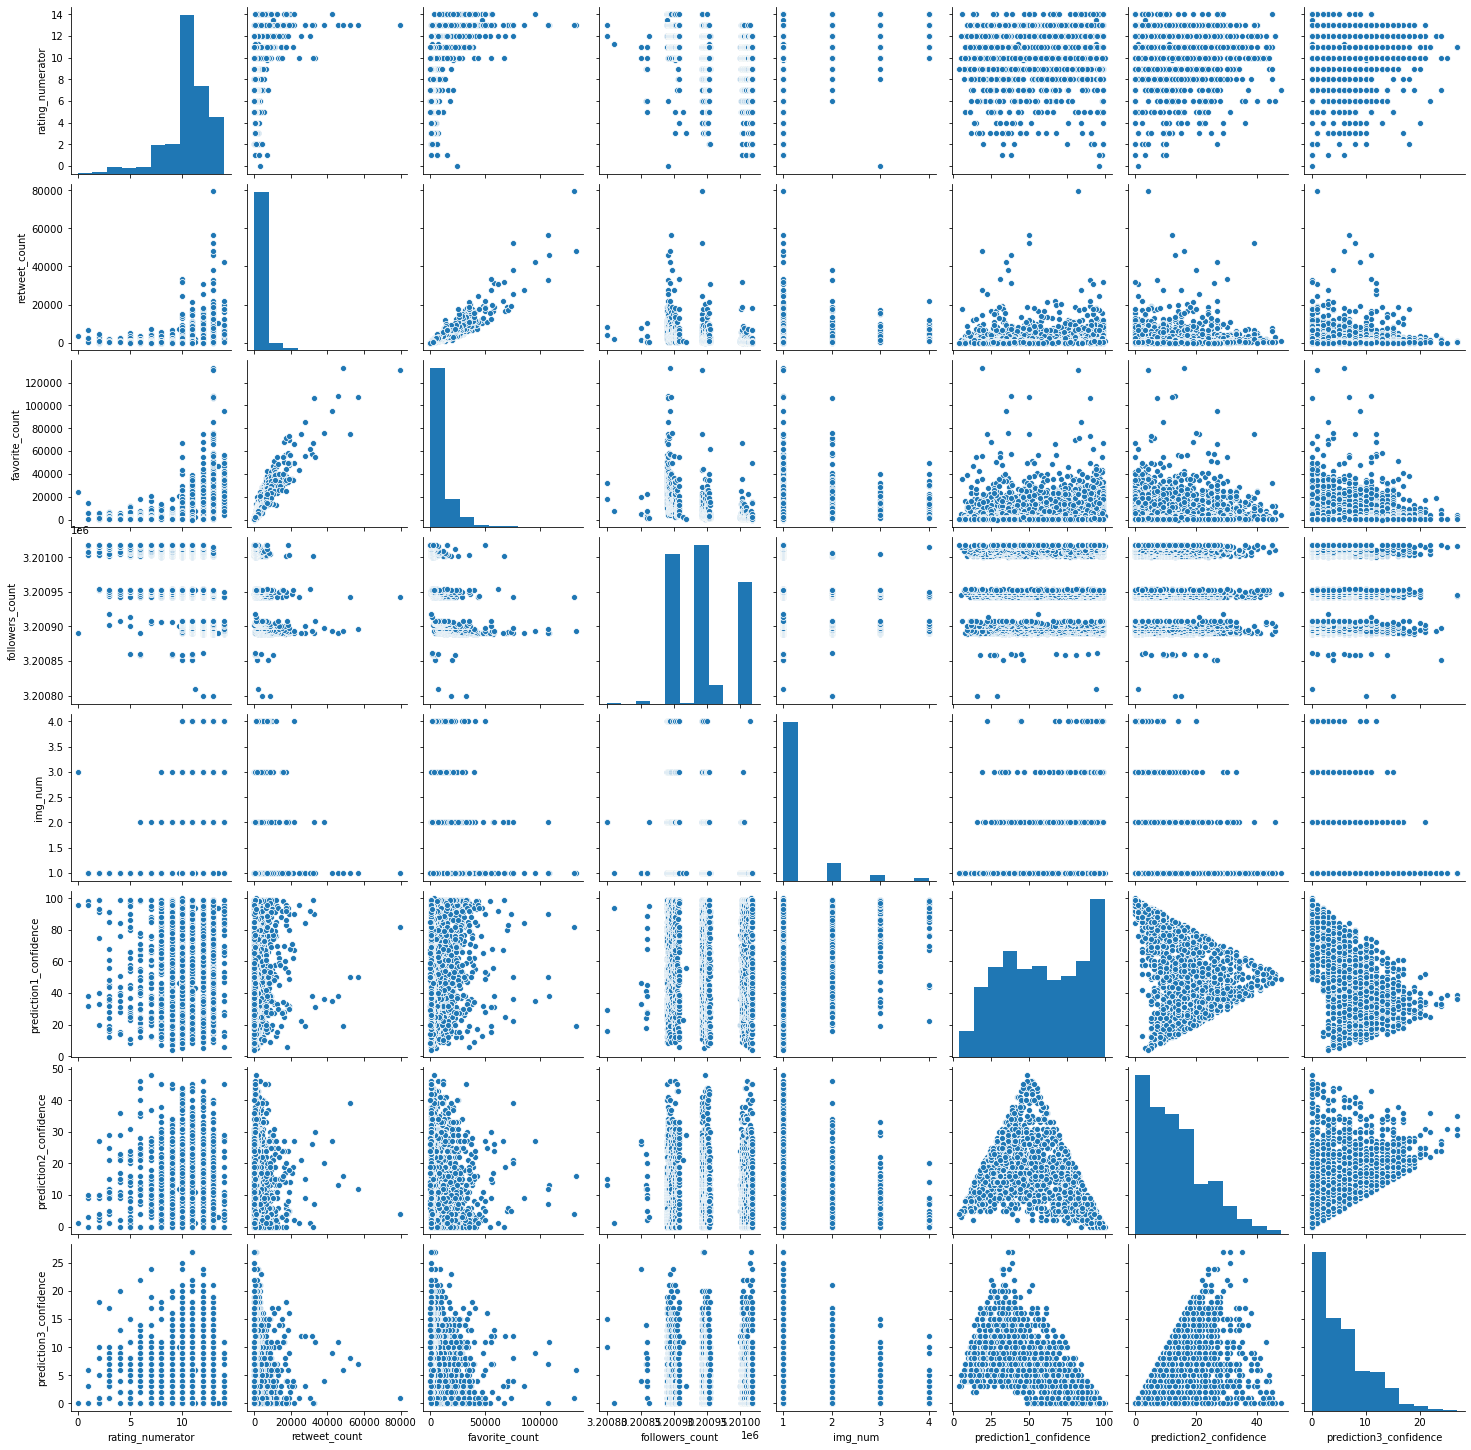

In [111]:
#use the scatter matirx of seaborn to measure correlation
df_scatter=twitter_archive_master.iloc[:,[5,9,10,11,13,15,18,21]]
sns.pairplot(df_scatter)

In [112]:
#we try to find which dog_bread has the highest rating and has the higest retweets and favourite
twitter_archive_master.dog_breed.value_counts()

pupper           201
doggo             63
puppo             22
doggo-pupper       8
floofer            7
doggo-floofer      1
doggo-puppo        1
Name: dog_breed, dtype: int64

In [113]:
#fillter the dataframe by its values
pupper=twitter_archive_master.query('dog_breed == "pupper"')
doggo=twitter_archive_master.query('dog_breed == "doggo"')
puppo=twitter_archive_master.query('dog_breed == "puppo"')
doggo_pupper=twitter_archive_master.query('dog_breed == "doggo-pupper"')
floofer=twitter_archive_master.query('dog_breed == "floofer"')
doggo_puppo=twitter_archive_master.query('dog_breed == "doggo-puppo"')
doggo_floofer=twitter_archive_master.query('dog_breed == "doggo-floofer"')

In [114]:
pupper.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_breed',
       'retweet_count', 'favorite_count', 'followers_count', 'jpg_url',
       'img_num', 'prediction1', 'prediction1_confidence', 'prediction1_dog',
       'prediction2', 'prediction2_confidence', 'prediction2_dog',
       'prediction3', 'prediction3_confidence', 'prediction3_dog'],
      dtype='object')

In [115]:
#use describe to compare
pupper.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,201.000000,201.000000,201.000000
mean,10.638159,2382.502488,7250.527363
std,1.736025,3584.033641,10743.931650
min,3.000000,103.000000,693.000000
25%,10.000000,695.000000,2449.000000
50%,11.000000,1219.000000,3275.000000
75%,12.000000,2475.000000,7842.000000
max,14.000000,32883.000000,106827.000000


In [116]:
doggo.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,63.000000,63.000000,63.000000
mean,11.888889,7125.698413,19356.380952
std,1.471351,12868.874516,22208.483825
min,8.000000,725.000000,2593.000000
25%,11.000000,2025.500000,8268.000000
50%,12.000000,3327.000000,12376.000000
75%,13.000000,5422.000000,20502.500000
max,14.000000,79515.000000,131075.000000


In [117]:
puppo.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,22.000000,22.000000,22.000000
mean,12.000000,6473.954545,21582.090909
std,1.309307,10301.927187,28034.339585
min,9.000000,716.000000,3277.000000
25%,11.250000,1712.500000,7043.500000
50%,12.000000,3130.000000,13387.500000
75%,13.000000,6284.250000,19691.250000
max,14.000000,48265.000000,132810.000000


In [118]:
doggo_pupper.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,8.00000,8.00000,8.000000
mean,11.00000,4397.25000,13219.875000
std,2.56348,5383.45584,12872.606889
min,5.00000,1265.00000,4849.000000
25%,11.50000,2365.00000,8206.250000
50%,12.00000,2543.00000,9346.500000
75%,12.00000,3193.00000,10731.750000
max,13.00000,17621.00000,44619.000000


In [119]:
floofer.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,7.000000,7.000000,7.000000
mean,12.000000,4968.714286,13206.000000
std,1.154701,6163.579715,11258.315105
min,10.000000,496.000000,2262.000000
25%,11.500000,1825.000000,5045.500000
50%,12.000000,3265.000000,11302.000000
75%,13.000000,4436.500000,17721.000000
max,13.000000,18497.000000,33345.000000


In [120]:
doggo_puppo.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,1.0,1.0,1.0
mean,13.0,19196.0,47844.0
std,NaN,NaN,NaN
min,13.0,19196.0,47844.0
25%,13.0,19196.0,47844.0
50%,13.0,19196.0,47844.0
75%,13.0,19196.0,47844.0
max,13.0,19196.0,47844.0


In [121]:
doggo_floofer.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,1.0,1.0,1.0
mean,11.0,3433.0,17169.0
std,NaN,NaN,NaN
min,11.0,3433.0,17169.0
25%,11.0,3433.0,17169.0
50%,11.0,3433.0,17169.0
75%,11.0,3433.0,17169.0
max,11.0,3433.0,17169.0


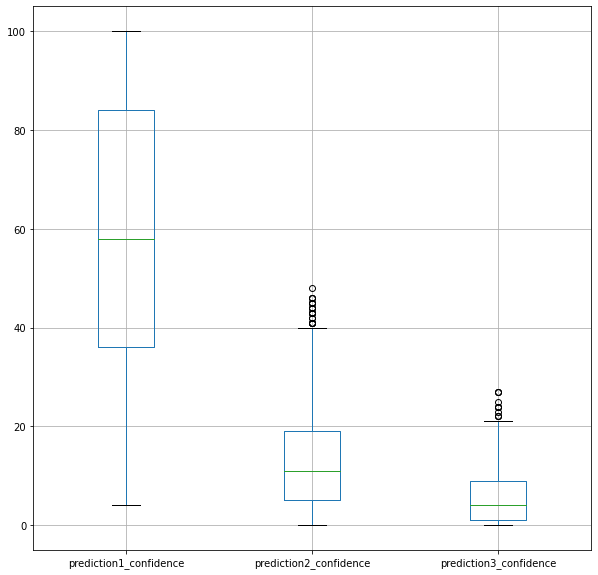

In [122]:
#we will use box plot for the three predictions columns to compare between them
predictions=['prediction1_confidence','prediction2_confidence','prediction3_confidence']
boxplot = twitter_archive_master.boxplot(column=predictions,figsize=(10,10))

In [123]:
#we will use prediction1 since it has the highest accuracy
twitter_archive_master.prediction1.value_counts()

golden_retriever       136
Labrador_retriever      94
Pembroke                88
Chihuahua               78
pug                     54
                      ... 
American_black_bear      1
cliff                    1
king_penguin             1
piggy_bank               1
lorikeet                 1
Name: prediction1, Length: 372, dtype: int64

In [124]:
#we will use the 5 tykpes that are existed alot in it
golden_retriever=twitter_archive_master.query('prediction1 == "golden_retriever"')
Labrador_retriever=twitter_archive_master.query('prediction1 == "Labrador_retriever"')
Pembroke=twitter_archive_master.query('prediction1 == "Pembroke"')
Chihuahua=twitter_archive_master.query('prediction1 == "Chihuahua"')
pug=twitter_archive_master.query('prediction1 == "pug"')

In [125]:
golden_retriever.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,136.000000,136.000000,136.000000
mean,11.643382,3673.308824,12408.441176
std,1.207857,4395.854494,13052.891084
min,8.000000,54.000000,198.000000
25%,11.000000,1211.500000,3600.500000
50%,12.000000,2308.000000,8296.000000
75%,12.000000,4377.500000,16269.500000
max,14.000000,27728.000000,85011.000000


In [126]:
Labrador_retriever.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,94.00000,94.000000,94.000000
mean,11.12766,3884.138298,11880.968085
std,1.32984,8777.297752,17318.881614
min,7.00000,96.000000,318.000000
25%,10.00000,627.250000,2290.000000
50%,11.00000,1747.000000,5578.500000
75%,12.00000,4353.750000,16341.750000
max,13.00000,79515.000000,131075.000000


In [127]:
Pembroke.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,88.000000,88.000000,88.000000
mean,11.443182,3185.988636,11304.034091
std,1.721119,3169.873940,12035.556262
min,4.000000,90.000000,171.000000
25%,11.000000,1063.500000,3239.500000
50%,12.000000,1972.500000,6554.000000
75%,12.000000,4216.500000,15400.750000
max,14.000000,18781.000000,69871.000000


In [128]:
Chihuahua.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,78.000000,78.000000,78.000000
mean,10.692308,2815.512821,8634.948718
std,1.982440,6744.251472,14980.902404
min,3.000000,52.000000,131.000000
25%,10.000000,523.000000,1305.500000
50%,11.000000,938.500000,2947.000000
75%,12.000000,2894.500000,10624.250000
max,14.000000,56625.000000,107015.000000


In [129]:
pug.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,54.000000,54.000000,54.000000
mean,10.240741,1836.703704,5930.055556
std,1.912572,2210.593540,8312.103243
min,3.000000,47.000000,121.000000
25%,9.250000,582.500000,1684.000000
50%,10.000000,988.500000,2639.000000
75%,11.000000,1873.000000,5822.250000
max,13.000000,10352.000000,36689.000000


In [130]:
#we can check the famous users on twitter(that has the large followers) could afect ration and retweet and favourite_count
twitter_archive_master.followers_count.describe()

count    1.968000e+03
mean     3.200946e+06
std      4.483237e+01
min      3.200799e+06
25%      3.200901e+06
50%      3.200947e+06
75%      3.201002e+06
max      3.201018e+06
Name: followers_count, dtype: float64

In [131]:
#we will use in filltering depends on 75%,50%,25%
famous_75=twitter_archive_master.query('followers_count >3201002')
famous_50=twitter_archive_master.query('followers_count >3200901 & followers_count <3201002')
famous_25=twitter_archive_master.query('followers_count <3200901')


In [132]:
famous_75.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,470.000000,470.000000,470.000000
mean,9.117021,693.265957,1574.802128
std,2.358383,1544.147990,3467.359642
min,1.000000,16.000000,81.000000
25%,8.000000,180.000000,480.000000
50%,10.000000,346.500000,900.500000
75%,11.000000,619.750000,1428.750000
max,13.000000,18963.000000,49720.000000


In [133]:
famous_50.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,895.000000,895.000000,895.000000
mean,10.365654,2247.921788,5949.184358
std,1.854894,4251.099156,7611.285853
min,2.000000,112.000000,716.000000
25%,10.000000,834.000000,2768.000000
50%,11.000000,1268.000000,3849.000000
75%,12.000000,2108.500000,6307.500000
max,14.000000,79515.000000,131075.000000


In [134]:
famous_25.iloc[:,[5,9,10]].describe()

,rating_numerator,retweet_count,favorite_count
count,472.000000,472.000000,472.000000
mean,12.224089,5717.629237,21661.572034
std,1.246721,6165.631583,15856.832662
min,0.000000,308.000000,1597.000000
25%,12.000000,2618.250000,11486.250000
50%,12.000000,3902.500000,17521.000000
75%,13.000000,6426.500000,27116.500000
max,14.000000,56625.000000,132810.000000
